1. Load the data file and explore the data, showing size, and data distributions
2. drop the columns that are not relevant for the clustering operation, if
any, and explain why you do that  
3. find the best clustering scheme and compute: a) the quality indexes
usual for clustering and b) the size of the clusters 
4. apply a data transformation using the preprocessor below  
from sklearn.preprocessing import PowerTransformer, \
StandardScaler
from sklearn.pipeline import make_pipeline
preprocessor = make_pipeline(
StandardScaler(with_std=False),
PowerTransformer(standardize=True),
)
5. find the best clustering scheme for the transformed data, as done in
step 3 
6. show together the results of the two clustering schemes obtained and
comment which of the two is better and why 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid 
from sklearn.metrics import silhouette_score, accuracy_score
warnings.filterwarnings('ignore')

%matplotlib inline
random_state = 42
np.random.seed(random_state)

filenam = './datasets/income.csv'
separator = ','

In [2]:
df = pd.read_csv(filenam, sep=separator, header=0, index_col=0)
print(f'Dataset with {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

Dataset with 7891 rows and 10 columns


,Territorio,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,Abano Terme,0.0,3641.0,1997.0,4567.0,3268.0,413.0,400.0,177.0,347774542.0
1,Abbadia Cerreto,0.0,50.0,29.0,73.0,41.0,0.0,0.0,0.0,3399810.0
2,Abbadia Lariana,0.0,511.0,276.0,792.0,656.0,78.0,48.0,31.0,59153455.0
3,Abbadia San Salvatore,0.0,1303.0,783.0,1820.0,754.0,69.0,33.0,13.0,87615654.0
4,Abbasanta,0.0,577.0,194.0,443.0,430.0,26.0,13.0,0.0,30992769.0


In [3]:
df.describe()

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
count,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7.891000e+03
mean,0.436320,1503.934989,682.607528,1514.311367,1141.186668,112.176403,85.558738,39.987961,1.094664e+08
std,7.708889,8019.878927,3173.115435,6818.879697,7609.469415,1152.192290,978.254230,588.108958,7.821773e+08
min,0.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.388280e+05
25%,0.000000,226.000000,109.000000,207.000000,112.000000,7.000000,4.000000,0.000000,1.193600e+07
50%,0.000000,525.000000,253.000000,520.000000,309.000000,21.000000,14.000000,5.000000,3.099277e+07
75%,0.000000,1256.000000,600.000000,1347.000000,876.500000,68.000000,46.000000,20.000000,8.517508e+07
max,456.000000,540724.000000,205064.000000,413523.000000,520285.000000,78473.000000,66290.000000,35644.000000,5.130494e+10


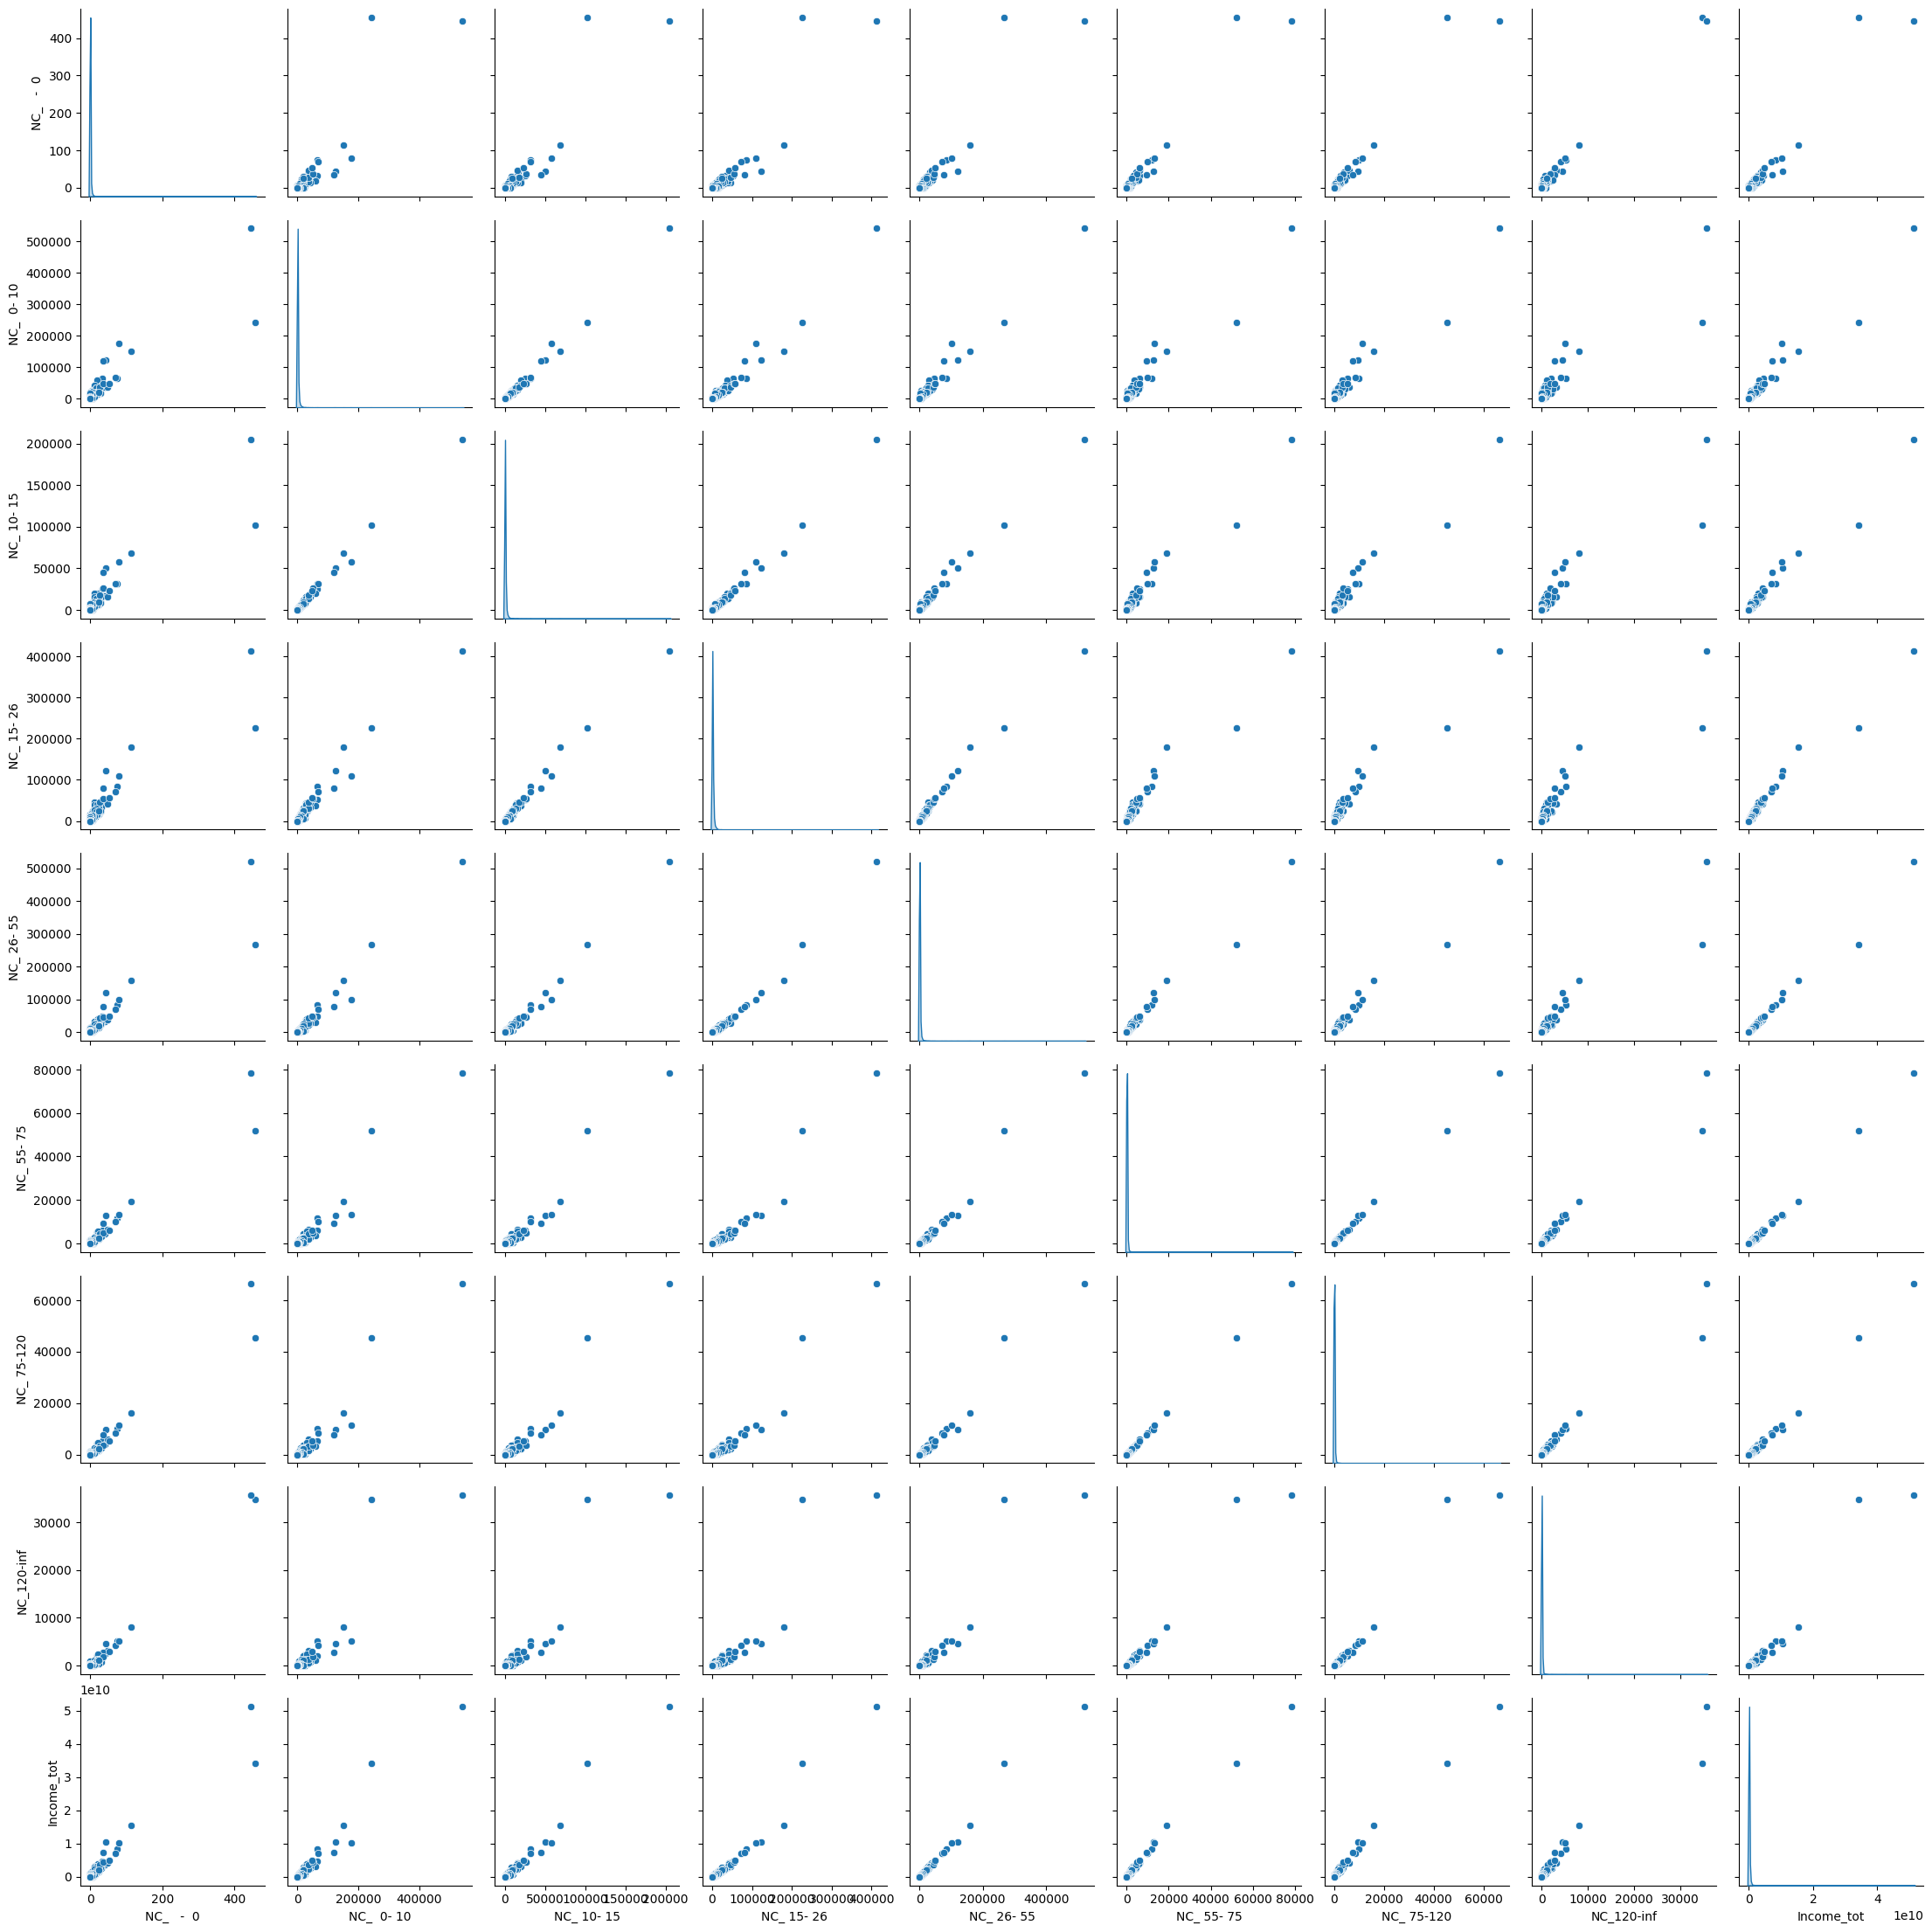

In [4]:
sns.pairplot(df, diag_kind='kde');

# 2

From the pairplot we can see that some columns are very similar so we can ignore them for the clustering activity

In [5]:
to_delete = ['NC_120-inf', 'NC_   -  0', 'Territorio']
# df.columns
df = df.drop(to_delete, axis=1)

# 3

In [6]:
max_clusters = 15
inertia = []
silhouette = []
params = {'n_clusters': range(2, max_clusters+1)}
for param in ParameterGrid(params):
    model = KMeans(**param, random_state=random_state)
    pred = model.fit_predict(df)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(df, pred))


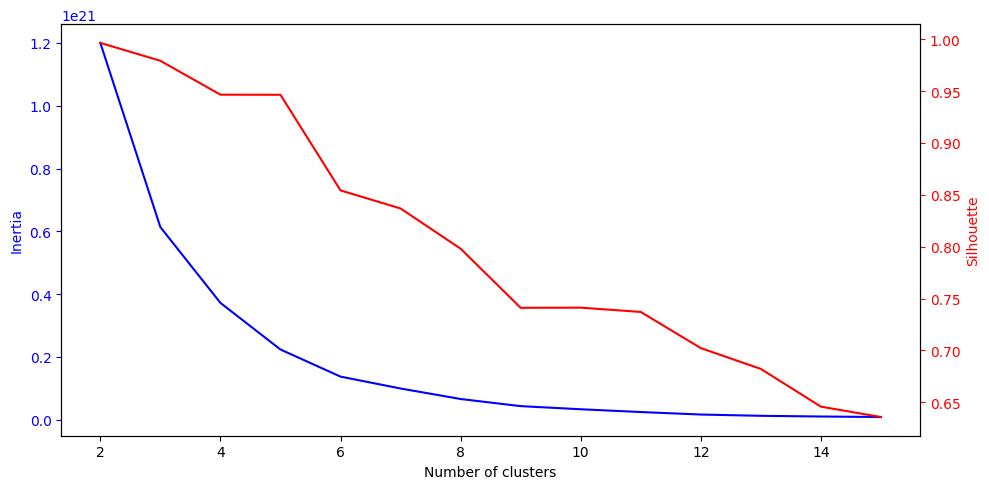

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(range(2, max_clusters+1), inertia, 'b-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(2, max_clusters+1), silhouette, 'r-')
ax2.set_ylabel('Silhouette', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

A good approximation for K is 5

In [8]:
model_km = KMeans(n_clusters=5, random_state=random_state)
pred_km = model_km.fit_predict(df)

In [9]:
print(f'Inertia: {model_km.inertia_}')
print(f'Silhouette: {silhouette_score(df, pred_km)}')

Inertia: 2.238576125705362e+20
Silhouette: 0.946426136924781


In [13]:
for i in range(5):
    print(f'Cluster {i}: {np.sum(pred_km == i)}')

Cluster 0: 7825
Cluster 1: 1
Cluster 2: 6
Cluster 3: 1
Cluster 4: 58


# 4

In [14]:
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.pipeline import make_pipeline
preprocessor = make_pipeline(
    StandardScaler(with_std=False),
    PowerTransformer(standardize=True),
)

In [15]:
preprocessor.fit(df)
df_scaled = preprocessor.transform(df)

# 5

In [19]:
max_clusters = 15
inertia_scaled = []
silhouette_scaled = []
params_scaled = {'n_clusters': range(2, max_clusters+1)}
for param in ParameterGrid(params_scaled):
    model_scaled = KMeans(**param, random_state=random_state)
    pred_scaled = model_scaled.fit_predict(df)
    inertia_scaled.append(model_scaled.inertia_)
    silhouette_scaled.append(silhouette_score(df, pred_scaled))

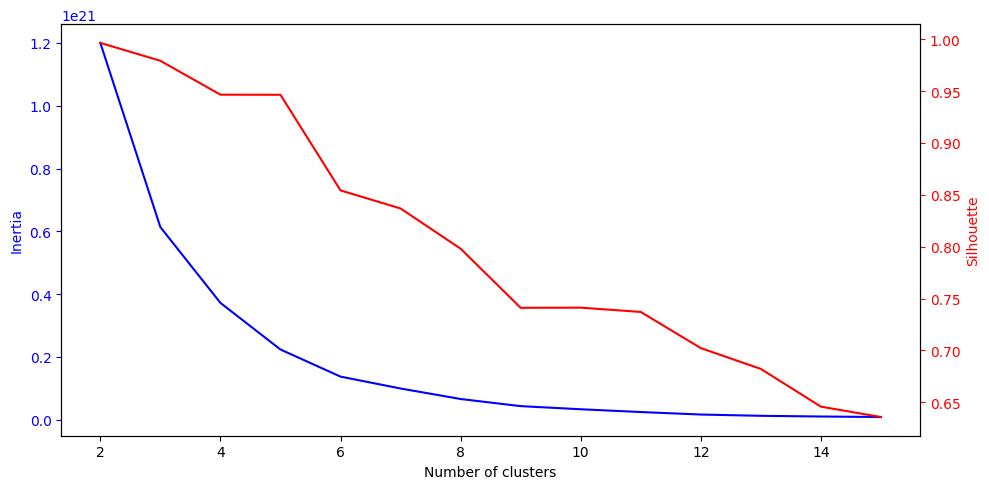

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(range(2, max_clusters+1), inertia_scaled, 'b-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(2, max_clusters+1), silhouette_scaled, 'r-')
ax2.set_ylabel('Silhouette', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

Even in this case K=5 is a good approximation

In [21]:
model_km_scaled = KMeans(n_clusters=5, random_state=random_state)
pred_km_scaled = model_km_scaled.fit_predict(df_scaled)

In [22]:
print(f'Inertia: {model_km_scaled.inertia_}')
print(f'Silhouette: {silhouette_score(df_scaled, pred_km_scaled)}')

Inertia: 6542.2511903902205
Silhouette: 0.46898774102402524


In [23]:
for i in range(5):
    print(f'Cluster {i}: {np.sum(pred_km_scaled == i)}')

Cluster 0: 1231
Cluster 1: 3115
Cluster 2: 1688
Cluster 3: 1850
Cluster 4: 7


# 6

In [24]:
results = pd.DataFrame(
    {
        'Inertia': [model_km.inertia_, model_km_scaled.inertia_],
        'Silhouette': [silhouette_score(df, pred_km), silhouette_score(df_scaled, pred_km_scaled)],
    },
    index=['Original', 'Scaled'],
)

In [25]:
results

,Inertia,Silhouette
Original,2.238576e+20,0.946426
Scaled,6.542251e+03,0.468988


Scaled model is better